In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')

In [149]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
import tensorflow as tf
import keras

In [111]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore


In [151]:
df = pd.read_csv("diabetes.csv")


In [152]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [153]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [115]:
df.duplicated().sum()

0

In [116]:
df.shape

(768, 9)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [118]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


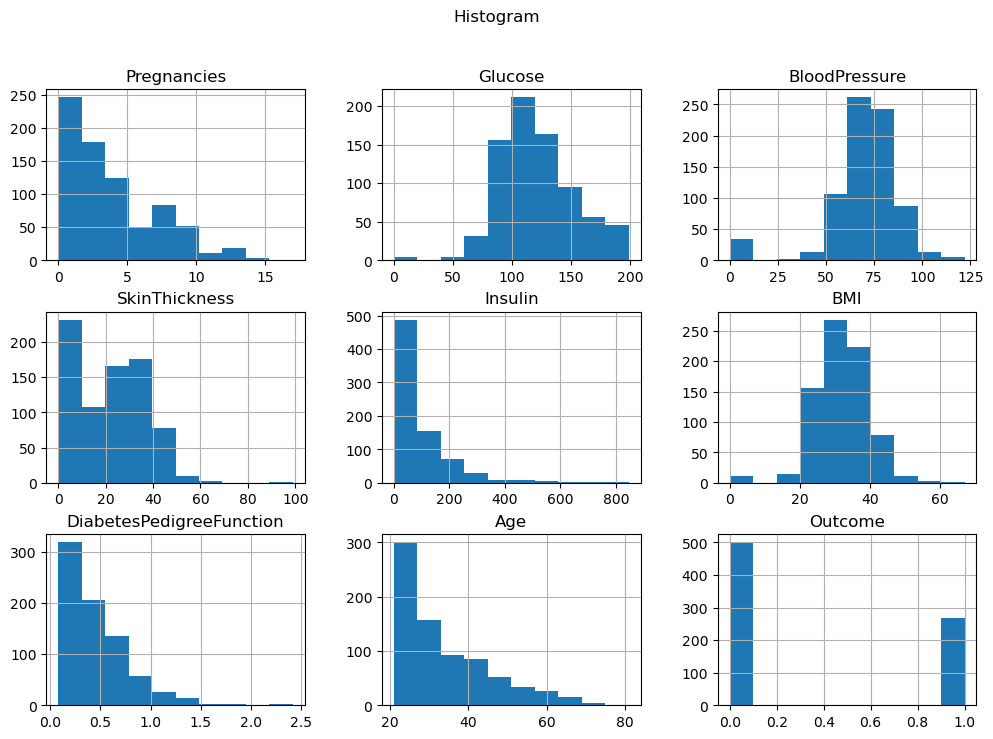

In [119]:
df.hist(figsize=(12,8))
plt.suptitle("Histogram")
plt.show()

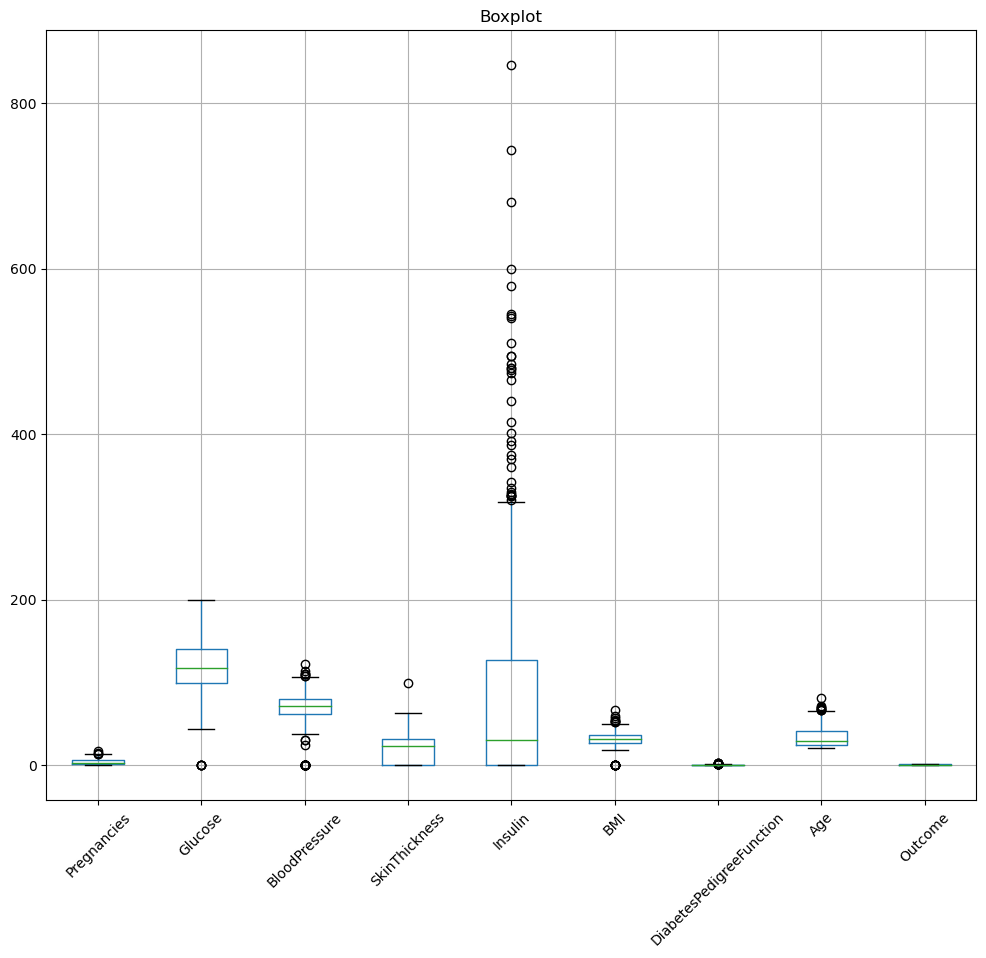

In [120]:
df.boxplot(figsize=(12,10))
plt.title("Boxplot")
plt.xticks(rotation = 45)
plt.show()

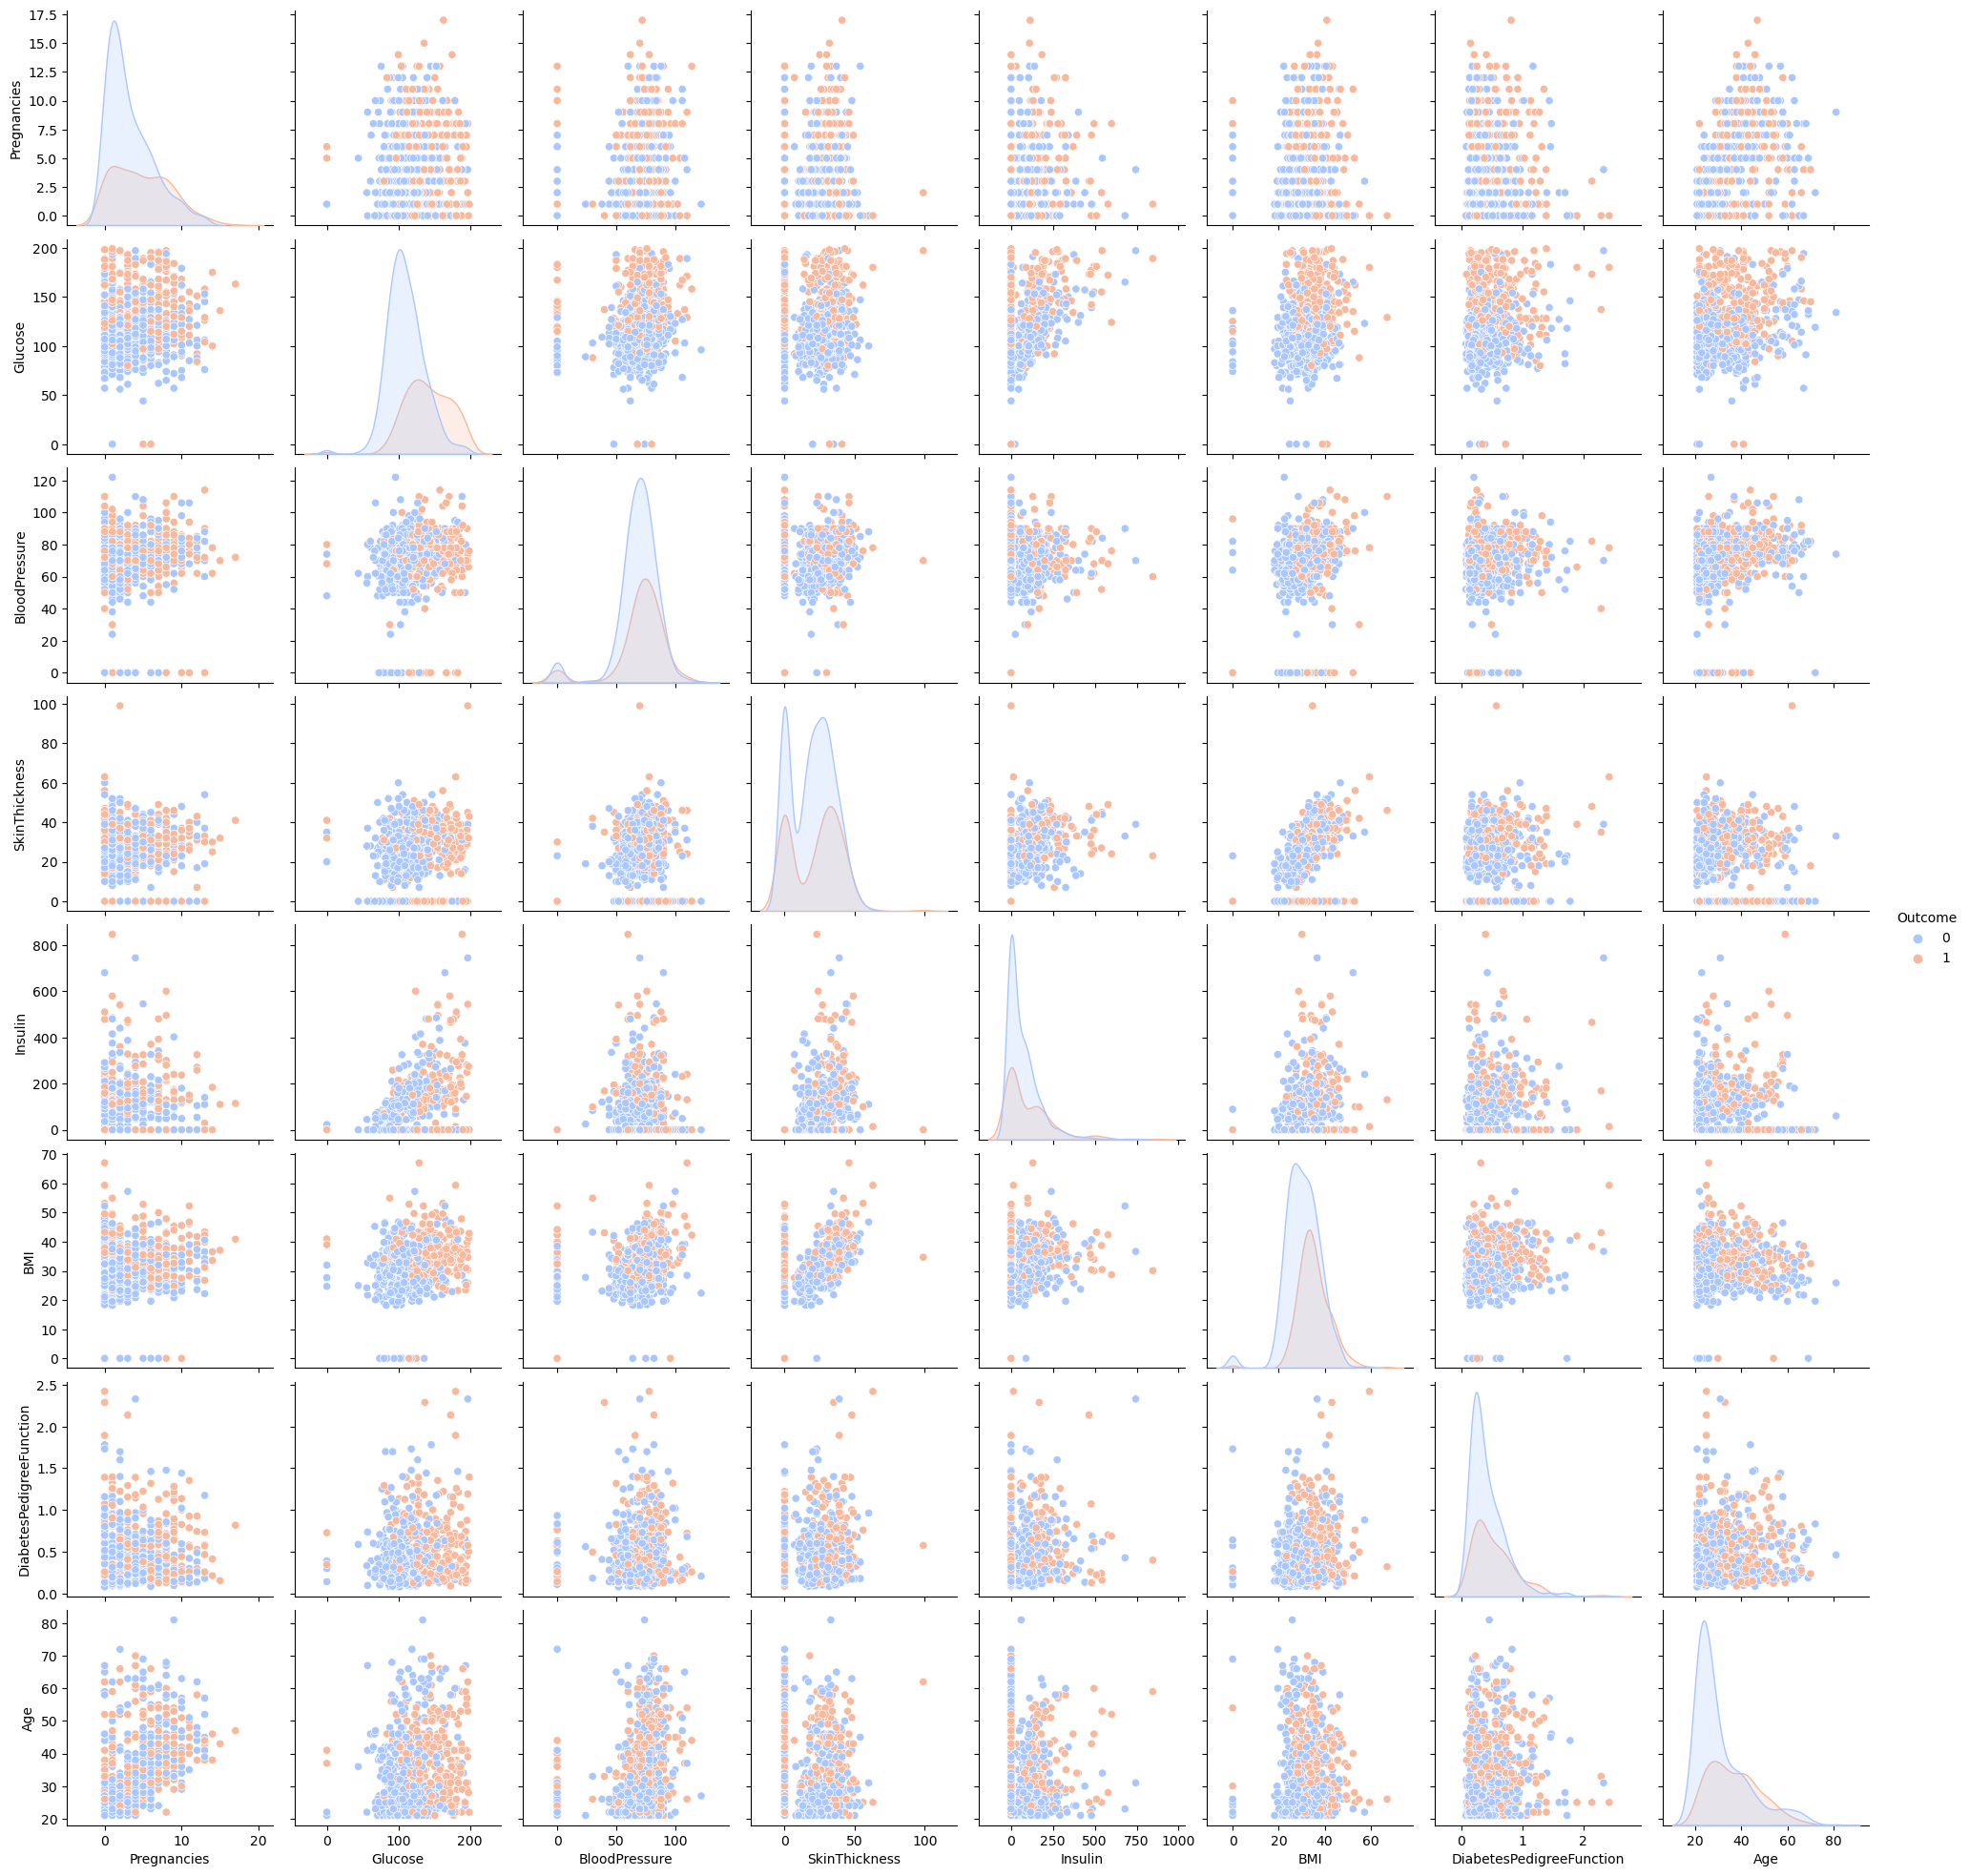

In [121]:
sns.pairplot(df, hue="Outcome",palette='coolwarm',diag_kind='kde')
plt.show()

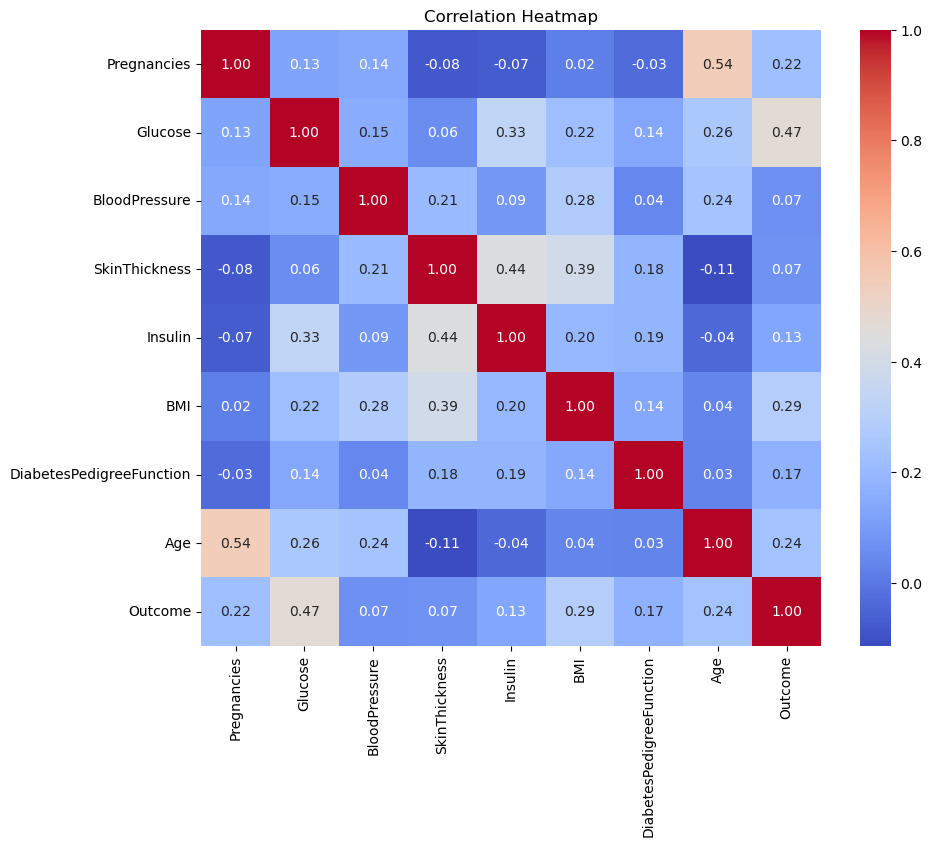

In [122]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

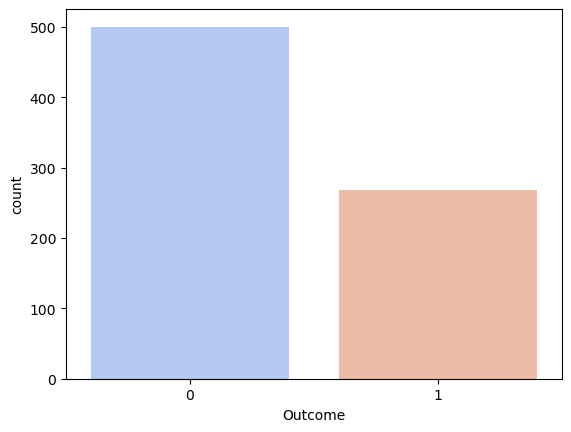

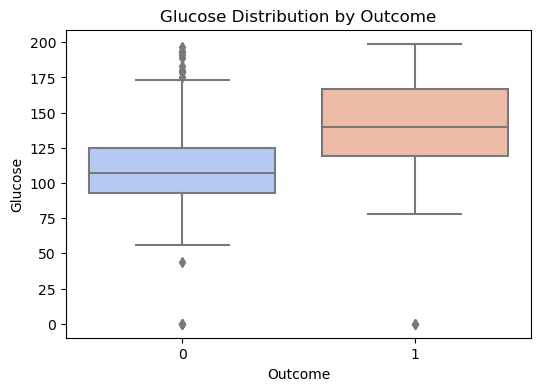

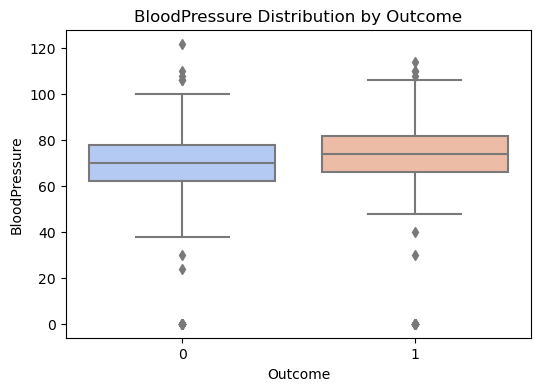

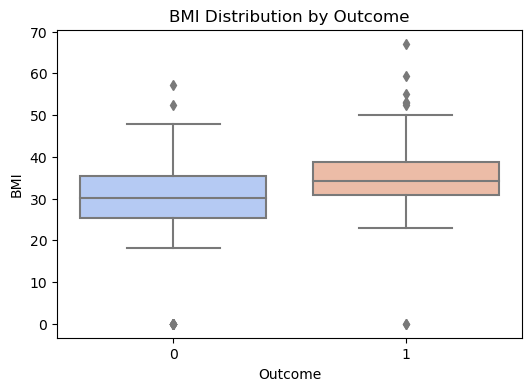

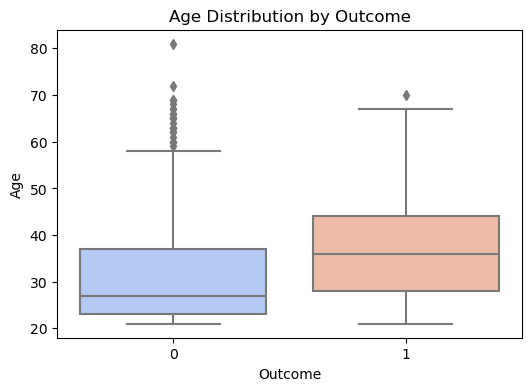

In [123]:
sns.countplot(x=df["Outcome"], palette="coolwarm")
features = ["Glucose", "BloodPressure", "BMI", "Age"]
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Outcome", y=feature, data=df, palette="coolwarm")
    plt.title(f"{feature} Distribution by Outcome")
    plt.show()

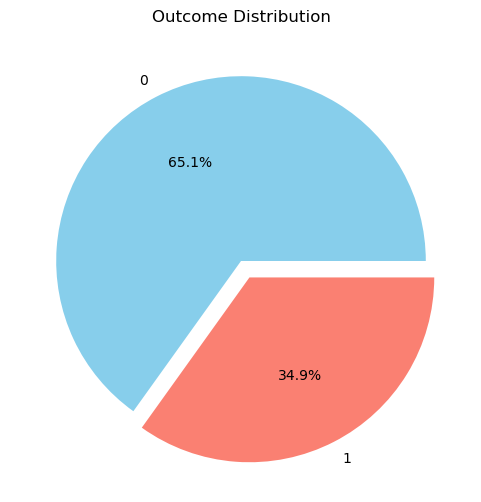

In [124]:
plt.figure(figsize=(6, 6))
df["Outcome"].value_counts().plot.pie(autopct='%1.1f%%', colors=["skyblue", "salmon"], explode=[0, 0.1])
plt.title("Outcome Distribution")
plt.ylabel("")
plt.show()

In [154]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [155]:
#LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy*100:.4f}%')
report=classification_report(y_test, y_pred)
print(report)

accuracy: 75.3247%
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [156]:
#KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy1*100:.4f}%')
report1 = classification_report(y_test, y_pred)
print(report1)

accuracy: 68.8312%
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154



In [157]:
#DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy2*100:.4f}%')
report2 = classification_report(y_test, y_pred)
print(report2)

accuracy: 74.0260%
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.75      0.74      0.74       154



In [158]:
#RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy3*100:.4f}%')
print(classification_report(y_test, y_pred))

accuracy: 74.0260%
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



In [159]:
#AdaBoostClassifier
model4 = AdaBoostClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy4*100:.4f}%')
print(classification_report(y_test, y_pred))

accuracy: 73.3766%
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [160]:
#GradientBoostingClassifier
model5 = GradientBoostingClassifier()
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy5*100:.4f}%')
print(classification_report(y_test, y_pred))

accuracy: 74.6753%
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [161]:
#SVC
model6 = SVC()
model6.fit(X_train, y_train)
y_pred = model6.predict(X_test)
accuracy6 = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy6*100:.4f}%')
print(classification_report(y_test, y_pred))

accuracy: 72.7273%
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



In [162]:
#GaussianNB
model7 = GaussianNB()
model7.fit(X_train, y_train)
y_pred = model7.predict(X_test)
accuracy7 = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy7*100:.4f}%')
print(classification_report(y_test, y_pred))

accuracy: 76.6234%
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [134]:
#xgb
model8 = xgb.XGBClassifier()
model8.fit(X_train, y_train)
y_pred = model8.predict(X_test)
accuracy8 = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy8*100:.4f}%')
print(classification_report(y_test, y_pred))

accuracy: 72.0779%
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        99
           1       0.59      0.71      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154



In [163]:
#LightGBM
model9 = lgb.LGBMClassifier()
model9.fit(X_train, y_train)
y_pred = model9.predict(X_test)
accuracy9 = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy9*100:.4f}%')
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


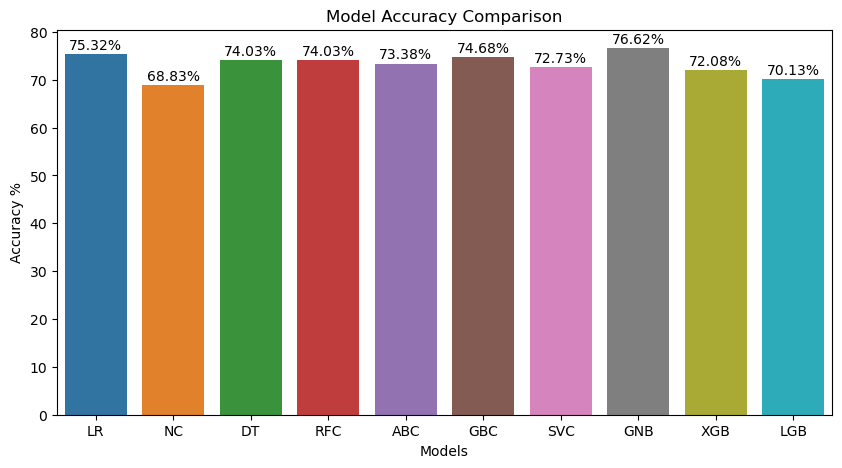

In [173]:
LR = accuracy * 100
NC = accuracy1 * 100
DT = accuracy2 * 100
RFC = accuracy3 * 100
ABC = accuracy4 * 100
GBC = accuracy5 * 100
SVC = accuracy6 * 100
GNB = accuracy7 * 100
XGB = accuracy8 * 100
LGB = accuracy9 * 100

Name = ['LR', 'NC', 'DT', 'RFC', 'ABC', 'GBC', 'SVC', 'GNB', 'XGB', 'LGB']

MODEL = [LR, NC, DT, RFC, ABC, GBC, SVC, GNB, XGB, LGB]

plt.figure(figsize=(10,5))
sns.barplot(x=Name,y=MODEL)

for i, v in enumerate(MODEL):
    plt.text(i, v + 1, f"{v:.2F}%", ha='center', fontsize=10)

plt.xlabel('Models')
plt.ylabel('Accuracy %')
plt.title('Model Accuracy Comparison')
plt.show()

In [202]:
from numpy import loadtxt

data = pd.read_csv('diabetes.csv')
data.to_csv('output.csv', index=False,header=False)
data = loadtxt("output.csv",delimiter=',')
data.shape

(768, 9)

In [198]:
x = data[:,0:8]
y = data[:,8]

In [199]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [203]:
model=Sequential()

In [204]:
model.add(Dense(8,input_dim=8,activation='relu')) #INPUT N
model.add(Dense(8,activation='relu'))#hidden layer
model.add(Dense(1,activation='sigmoid'))  #softmax #output

In [205]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(xtrain,ytrain,epochs=150,batch_size=42)

Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7397 - loss: 0.5391 
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7290 - loss: 0.5474 
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7447 - loss: 0.5523 
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7113 - loss: 0.5629
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7625 - loss: 0.5233
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7399 - loss: 0.5237 
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.7256 - loss: 0.5421
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7576 - loss: 0.5293
Epoch 9/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7444 - loss: 0.5289
Epoch 10/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7510 - loss: 0.5325 
Epoch 11/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7083 - loss: 0.5721 
Epoch 12/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a

In [216]:
loss, acc=model.evaluate(xtest,ytest)
print(f"Accuracy:{acc*100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7524 - loss: 0.5257
Accuracy:75.97%
